# 1. Install xgboost and lightgbm Packages

In [1]:
!pip install xgboost
!pip install lightgbm

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)


# 2. Import necessary libraries

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 3. Load Dataset

In [6]:
credit_data = pd.read_csv('credit_card_clean.csv')
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# 4. Data Understanding

## Exploring the variables
- ID : ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

- SEX: Gender (1=male, 2=female)

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

- MARRIAGE: Marital status (1=married, 2=single, 3=others)

- AGE: Age in years

- PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

## Target variable
* default.payment.next.month: Default payment (1=yes, 0=no)

**Note: NT is Taiwain Dollars1**

In [16]:
credit_data.shape

(30000, 25)

In [7]:
credit_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

# 5. Data Preparation

In [14]:
credit_data_2=credit_data.copy()

In [44]:
credit_data_2.drop('ID',axis=1,inplace=True)

In [45]:
le = LabelEncoder()
credit_data_2['SEX'] = le.fit_transform(credit_data_2['SEX'])
credit_data_2['EDUCATION'] = le.fit_transform(credit_data_2['EDUCATION'])
credit_data_2['MARRIAGE'] = le.fit_transform(credit_data_2['MARRIAGE'])
credit_data_2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [46]:
credit_data_2.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

# 6. Model Building

In [47]:
X = credit_data_2.drop('DEFAULT',axis=1)
y = credit_data_2[['DEFAULT']]

In [48]:
credit_data_2['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,stratify=y)

In [50]:
X_train.shape,y_train.shape

((24000, 23), (24000, 1))

In [51]:
X_test.shape,y_test.shape

((6000, 23), (6000, 1))

# 7. Model Training

In [52]:
rf_classifier   = RandomForestClassifier()
gb_classifier   = GradientBoostingClassifier()
adb_classifier  = AdaBoostClassifier()
xgb_classifier  = XGBClassifier()
lgbm_classifier = LGBMClassifier()

### Training time Analysis

In [53]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 10.3 s


RandomForestClassifier()

In [54]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 14.8 s


GradientBoostingClassifier()

In [55]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 3.33 s


AdaBoostClassifier()

In [56]:
%%time
xgb_classifier.fit(X_train,y_train)

Wall time: 1.63 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
%%time
lgbm_classifier.fit(X_train,y_train)

Wall time: 300 ms


LGBMClassifier()

# 8. Model Testing

In [58]:
y_pred_rf   = rf_classifier.predict(X_test)
y_pred_adb  = adb_classifier.predict(X_test)
y_pred_gb   = gb_classifier.predict(X_test)
y_pred_xgb  = xgb_classifier.predict(X_test)
y_pred_lgbm = lgbm_classifier.predict(X_test)

# 9. Model Evaluation

In [61]:
print(f'Accuracy of Random Forest Classifier  : {(accuracy_score(y_test,y_pred_rf)).round(3)}')
print(f'Accuracy of AdaBoost Classifier       : {(accuracy_score(y_test,y_pred_adb)).round((3))}')
print(f'Accuracy of Gradient Boost Classifier : {(accuracy_score(y_test,y_pred_gb)).round(3)}')
print(f'Accuracy of XGBoost Classifier        : {(accuracy_score(y_test,y_pred_xgb)).round(3)}')
print(f'Accuracy of LGBM Classifier           : {(accuracy_score(y_test,y_pred_lgbm)).round(3)}')

Accuracy of Random Forest Classifier  : 0.813
Accuracy of AdaBoost Classifier       : 0.813
Accuracy of Gradient Boost Classifier : 0.817
Accuracy of XGBoost Classifier        : 0.812
Accuracy of LGBM Classifier           : 0.818


# =============================================================

# FEATURE IMPORTANCE

In [62]:
columns = X_train.columns

In [63]:
rf_features = rf_classifier.feature_importances_
adb_features = adb_classifier.feature_importances_
gb_features = gb_classifier.feature_importances_
xgb_features = xgb_classifier.feature_importances_
lgbm_features = lgbm_classifier.feature_importances_

In [64]:
feature_imp = pd.DataFrame({'Features':columns,
                            'RF_features':rf_features,
                            'ADB_features':adb_features,
                            'GB_features':gb_features,
                            'XGB_features':xgb_features,
                            'LGBM_features':lgbm_features})
feature_imp

,Features,RF_features,ADB_features,GB_features,XGB_features,LGBM_features
0,LIMIT_BAL,0.060202,0.06,0.029542,0.024394,225
1,SEX,0.012055,0.02,0.003176,0.018503,33
2,EDUCATION,0.018377,0.00,0.001131,0.019902,60
3,MARRIAGE,0.012450,0.02,0.003999,0.020407,32
4,AGE,0.066254,0.00,0.006052,0.018538,219
5,PAY_1,0.089652,0.12,0.632776,0.383858,92
6,PAY_2,0.044348,0.04,0.085136,0.120813,46
7,PAY_3,0.026374,0.02,0.033073,0.047344,46
8,PAY_4,0.025636,0.02,0.014803,0.033362,27
9,PAY_5,0.025775,0.04,0.015360,0.037886,44


In [65]:
feature_imp_2=feature_imp.copy()

In [67]:
rf_imp_features = feature_imp_2.sort_values(by = 'RF_features',axis=0,ascending=False)
rf_imp_features

,Features,RF_features,ADB_features,GB_features,XGB_features,LGBM_features
5,PAY_1,0.089652,0.12,0.632776,0.383858,92
4,AGE,0.066254,0.00,0.006052,0.018538,219
11,BILL_AMT1,0.060834,0.20,0.031248,0.023620,248
0,LIMIT_BAL,0.060202,0.06,0.029542,0.024394,225
12,BILL_AMT2,0.054832,0.02,0.008647,0.020349,156
13,BILL_AMT3,0.052985,0.04,0.006777,0.019249,155
17,PAY_AMT1,0.051770,0.02,0.016922,0.021715,179
16,BILL_AMT6,0.050761,0.06,0.007211,0.018629,167
15,BILL_AMT5,0.050455,0.02,0.006209,0.018940,164
14,BILL_AMT4,0.050364,0.04,0.008188,0.019651,132


In [68]:
lgbm_imp_features = feature_imp_2.sort_values(by = 'LGBM_features',ascending=False)
lgbm_imp_features

,Features,RF_features,ADB_features,GB_features,XGB_features,LGBM_features
11,BILL_AMT1,0.060834,0.20,0.031248,0.023620,248
0,LIMIT_BAL,0.060202,0.06,0.029542,0.024394,225
4,AGE,0.066254,0.00,0.006052,0.018538,219
18,PAY_AMT2,0.048094,0.06,0.017991,0.022071,206
22,PAY_AMT6,0.046030,0.02,0.008920,0.019262,187
19,PAY_AMT3,0.046258,0.10,0.020174,0.022374,183
17,PAY_AMT1,0.051770,0.02,0.016922,0.021715,179
20,PAY_AMT4,0.043674,0.04,0.013278,0.020190,178
16,BILL_AMT6,0.050761,0.06,0.007211,0.018629,167
15,BILL_AMT5,0.050455,0.02,0.006209,0.018940,164


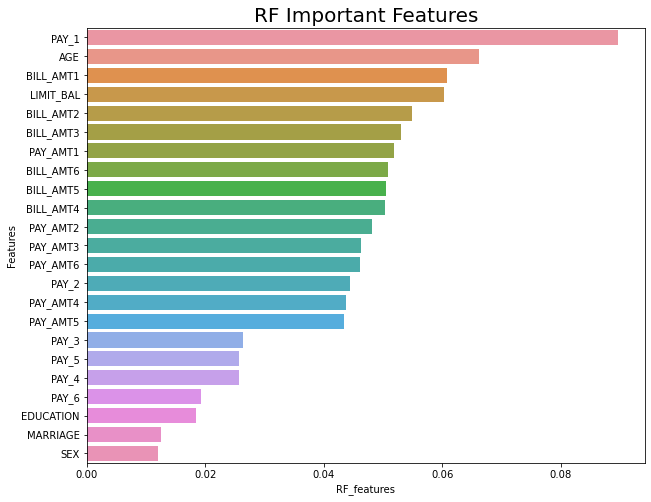

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_features',y='Features',data=rf_imp_features)
plt.title('RF Important Features',size = 20)
plt.show()

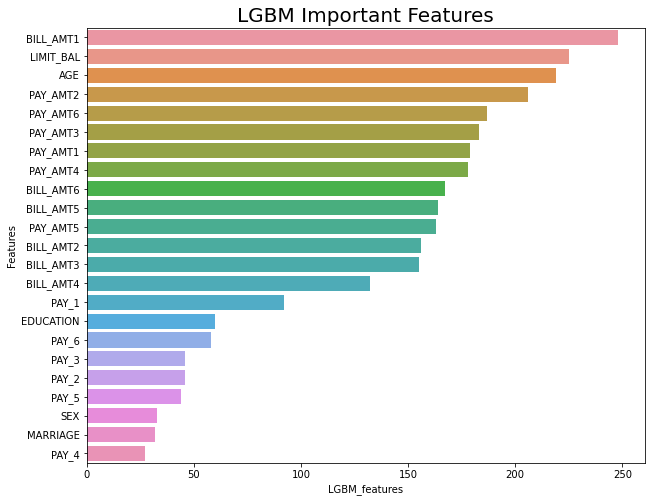

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='LGBM_features',y='Features',data=lgbm_imp_features)
plt.title('LGBM Important Features',size = 20)
plt.show()